<a href="https://colab.research.google.com/github/vindinudecosta/Mobile-Based-Crop-Leaf-Disease-Detection-System-Using-Deep-Learning/blob/main/Rice_Disease_Classification_TFlite_model_MobileNetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
from zipfile import ZipFile
with ZipFile('/content/gdrive/MyDrive/Rice Leaf Disease Images_zip.zip','r') as zipObj:
     zipObj.extractall('Rice Leaf Disease Images')

In [4]:
!pip install split-folders[full]

In [5]:
import splitfolders
input_folder = '/content/Rice Leaf Disease Images/Rice Leaf Disease Images'
splitfolders.ratio(input_folder,output ="dataset",
                   seed = 42,ratio=(0.7,0.1,0.2),
                   group_prefix=None)

Copying files: 9315 files [00:01, 4687.74 files/s]


In [6]:
import tensorflow as tf
from keras import models, layers
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator

In [7]:
IMAGE_SIZE = 256
BATCH_SIZE = 128
CHANNELS = 3
EPOCHS =10

In [8]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("/content/Rice Leaf Disease Images/Rice Leaf Disease Images")

Found 9315 files belonging to 7 classes.


In [9]:
class_names = dataset.class_names
class_names

['Bacterialblight',
 'Brownspot',
 'Healthy',
 'Leaf Blast',
 'Leaf Scald',
 'Narrow brown',
 'Tungro']

In [10]:
train_datagen = ImageDataGenerator(

                 rescale = 1./255,
                 horizontal_flip= True,
                 rotation_range =10

)

train_generator = train_datagen.flow_from_directory('/content/dataset/train',

                                                    target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                    batch_size= BATCH_SIZE,
                                                    class_mode='sparse',

                                                    )

Found 6518 images belonging to 7 classes.


In [11]:
validation_datagen = ImageDataGenerator(

                 rescale = 1./255,
                 horizontal_flip= True,
                 rotation_range =10

)

validation_generator = validation_datagen.flow_from_directory('/content/dataset/val',

                                                    target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                    batch_size= BATCH_SIZE,
                                                    class_mode='sparse',

                                                    )

Found 928 images belonging to 7 classes.


In [12]:
test_datagen = ImageDataGenerator(

                 rescale = 1./255,
                 horizontal_flip= True,
                 rotation_range =10

)

test_generator = test_datagen.flow_from_directory('/content/dataset/test',

                                                    target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='sparse',

                                                    )

Found 1869 images belonging to 7 classes.


In [13]:
input_shape=(IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes =7
base_model = tf.keras.applications.MobileNetV2(
    input_shape = input_shape,
    include_top=False,
    weights='imagenet',

)

for layer in base_model.layers:
    layer.trainable = False
#x = layers.Flatten()(x)
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(n_classes, activation='softmax')(x)

model = tf.keras.Model(inputs=base_model.input, outputs=outputs)


9406464/9406464 [==============================] - 0s 0us/step


In [14]:
model.compile(
  optimizer = 'RMSprop',
  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits =False),
  metrics = ['accuracy']

)

In [15]:
history = model.fit(

    train_generator,
    steps_per_epoch= 50,
    batch_size =BATCH_SIZE,
    validation_data= validation_generator,
    validation_steps =7,
    verbose=1,
    epochs =10
)

Epoch 1/10
50/50 [==============================] - 173s 3s/step - loss: 0.7356 - accuracy: 0.7371 - val_loss: 0.3497 - val_accuracy: 0.8806
Epoch 2/10
50/50 [==============================] - 136s 3s/step - loss: 0.3123 - accuracy: 0.8861 - val_loss: 0.2783 - val_accuracy: 0.8996
Epoch 3/10
50/50 [==============================] - 134s 3s/step - loss: 0.2244 - accuracy: 0.9167 - val_loss: 0.1738 - val_accuracy: 0.9319
Epoch 4/10
50/50 [==============================] - 133s 3s/step - loss: 0.1726 - accuracy: 0.9382 - val_loss: 0.3860 - val_accuracy: 0.8527
Epoch 5/10
50/50 [==============================] - 137s 3s/step - loss: 0.1242 - accuracy: 0.9562 - val_loss: 0.1263 - val_accuracy: 0.9565
Epoch 6/10
50/50 [==============================] - 136s 3s/step - loss: 0.1074 - accuracy: 0.9634 - val_loss: 0.1086 - val_accuracy: 0.9643
Epoch 7/10
50/50 [==============================] - 134s 3s/step - loss: 0.0876 - accuracy: 0.9692 - val_loss: 0.0748 - val_accuracy: 0.9743
Epoch 8/10
50

In [16]:
scores = model.evaluate(test_generator)

15/15 [==============================] - 34s 2s/step - loss: 0.0456 - accuracy: 0.9839


In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

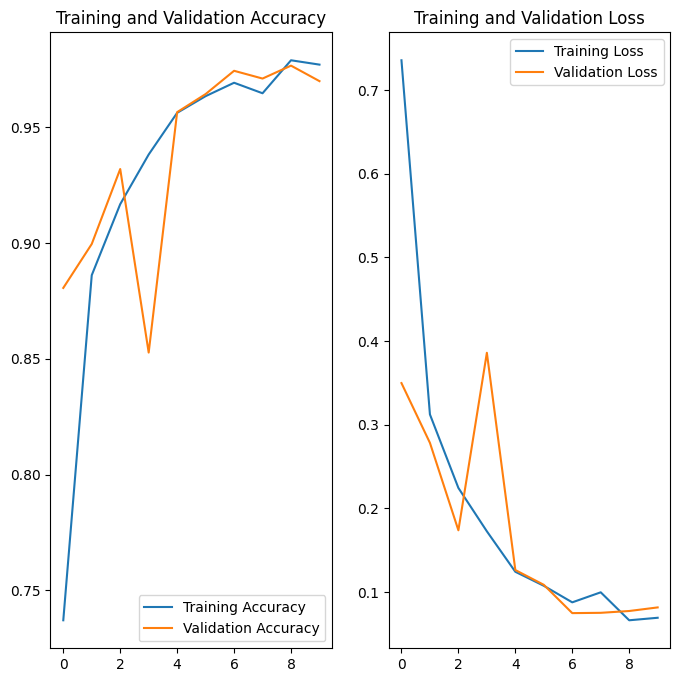

In [22]:
plt.figure(figsize =(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label = 'Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label = 'Training Loss')
plt.plot(range(EPOCHS),val_loss,label = 'Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

first image to predict
actual label:  Leaf Blast
4/4 [==============================] - 2s 38ms/step
Predicted label:  Leaf Blast


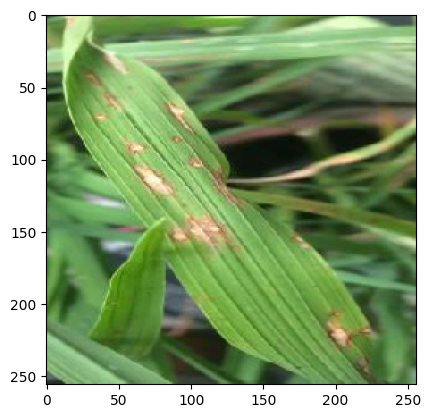

In [23]:
import numpy as np

for images_batch, labels_batch in test_generator:
  first_image = images_batch[0]
  first_label = int (labels_batch[0])

  print("first image to predict")
  plt.imshow(first_image)
  print("actual label: ", class_names[first_label])


  batch_prediction = model.predict(images_batch)
  print("Predicted label: ",class_names[np.argmax(batch_prediction[0])])
  break

In [24]:
def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i])
  img_array = tf.expand_dims(img_array,0)

  predictions = model.predict(img_array)

  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100* (np.max(predictions[0])),2)

  return predicted_class, confidence

1/1 [==============================] - 0s 27ms/step


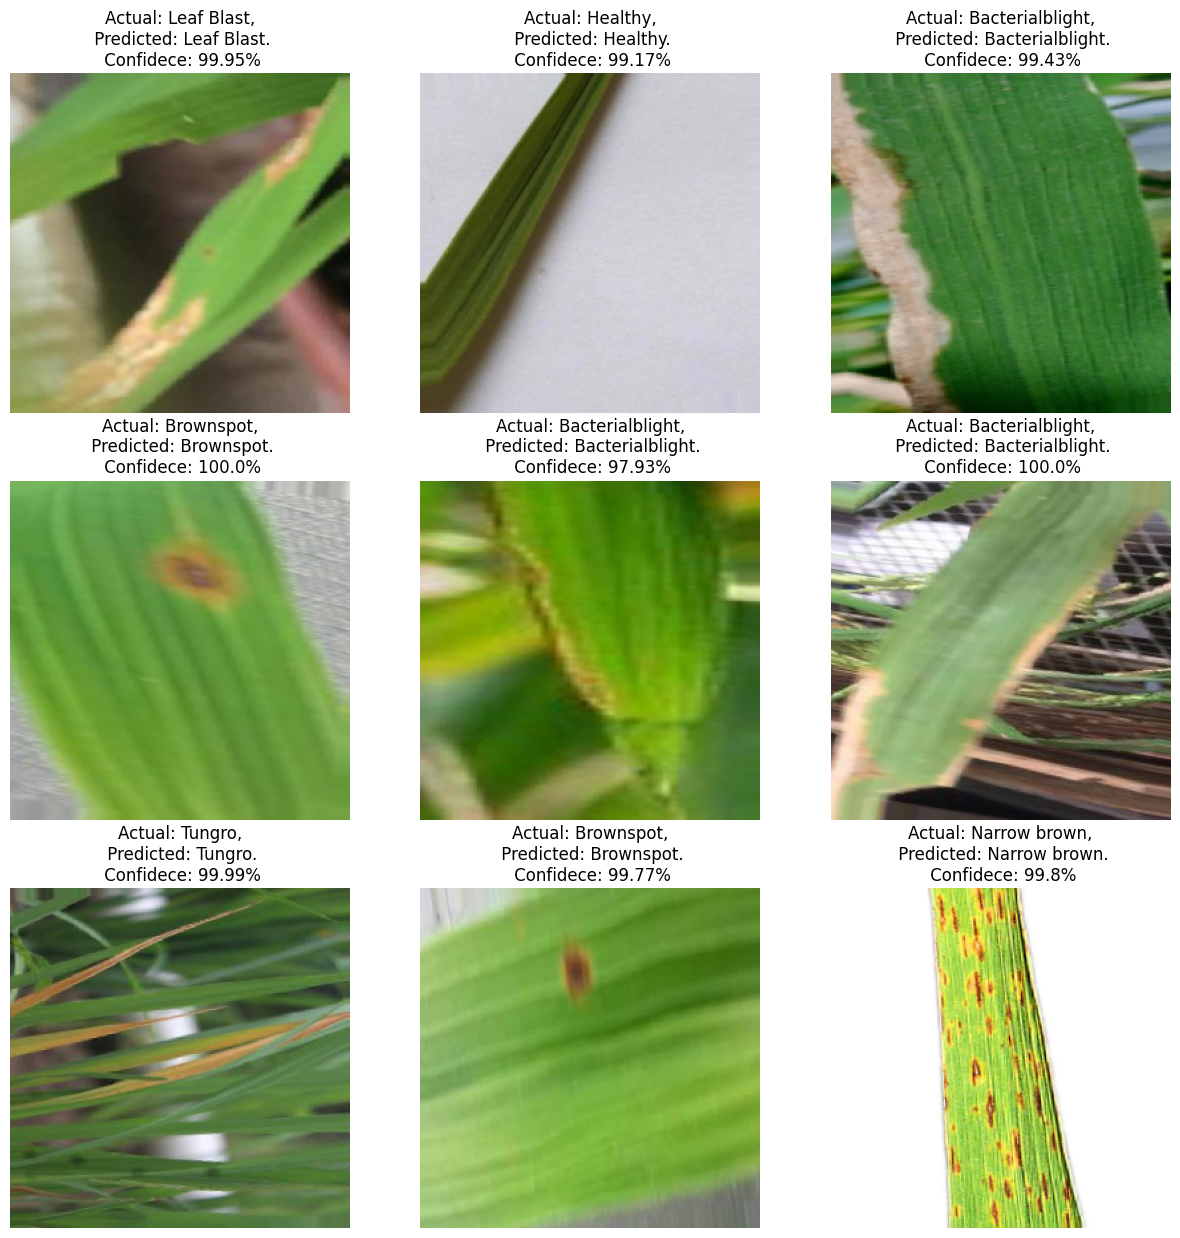

In [25]:
plt.figure(figsize = (15,15))
for images, labels in test_generator:

  for i in range(9):

    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i])

    predicted_class, confidence = predict(model, images[i])
    actual_class = class_names[int(labels[i])]

    plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidece: {confidence}%")

    plt.axis("off")
  break

In [26]:
model.save("/content/gdrive/MyDrive/Rice_disease_classification_models/trained_model_rice_100")

In [27]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

In [28]:
with open('/content/gdrive/MyDrive/Rice_disease_classification_models/tflite_quant_model_rice.tflite', 'wb') as f:
   f.write(tflite_quant_model)

